<a href="https://colab.research.google.com/github/aaron34x/Proyecto-Inteligencia-Aritificial/blob/main/Proyecto_final_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aaron Santiago Pedraza

Brandon Emilio Gonzalez
# Introducción:
La adolescencia representa la transición de la niñez a la edad adulta, es decir, es un periodo de desarrollo donde la persona adquiere las capacidades físicas y psíquicas que la identificarán como desarrollada, especialmente las sexuales, que le permitirán reproducirse. Al ser una etapa de profundos cambios, está marcada por la inestabilidad y, en la mayoría de las ocasiones, el desconcierto y la confusión de los propios jóvenes ante sus cambios.

Uno de estos cambios por los cuales los jóvenes estan supuestos a pasar es el consumó de alcohol, por lo cual a lo largo de este documento vamos analizar cuales son las características de lo jovenes mas consumidores de alcohol y sus calificaciones en tres diferentes periodos o cortes.

### Dataset
# El dataset que analizaremos está disponible en el siguiente [enlace].

[enlace]:<https://www.kaggle.com/uciml/student-alcohol-consumption>


### Objetivos
- Objetivo 1: Realizar un análisis exploratorio de los datos y conclusiones que se puedan sacar de ellos. 
- Objetivo 2: Realizar una predicción sobre los valores objetivo (G1, G2 y G3).

### Atributos del dataset
Los atributos para los conjuntos de datos de student-mat.cvs y student-por.cvs son: 

- school:escuela del estudiante (binario: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira)

- sex: sexo del estudiante (binario: 'F' - mujer o 'M' - hombre)

- age: edad del estudiante (numérico: de 15 a 22)

- address: tipo de dirección del hogar del estudiante (binario: 'U' - urbano o 'R' - rural)

- famsize: tamaño de la familia (binario: 'LE3' - menor o igual a 3 o 'GT3' - mayor que 3)

- Pstatus: estado de cohabitación de los padres (binario: 'T' viviendo juntos o 'A' - separados)

- Medu: educación de la madre (numérico: 0 - ninguno, 1 - educación primaria (4º grado), 2 - 5º a 9º grado, 3 - educación secundaria o 4 - educación superior

- Fedu: educación del padre (numérico: 0 - ninguno, 1 - educación primaria (4 ° grado), 2 - 5 ° a 9 ° grado, 3 - educación secundaria o 4 - educación superior)

- Mjob: trabajo de la madre (nominal: 'maestra', relacionado con la atención de 'salud', 'servicios' civiles (por ejemplo, administrativo o policial), 'en_casa' u 'otro')

- Fjob: trabajo del padre (nominal: 'maestro', relacionado con el cuidado de la salud, 'servicios' civiles (por ejemplo, administrativo o policial), 'en_home' u 'otro')

- reason: motivo para elegir esta escuela (nominal: cerca de 'casa', 'reputación' de la escuela, preferencia de 'curso' u 'otro')

- guardian: tutor del estudiante (nominal: 'madre', 'padre' u 'otro')
- traveltime: tiempo de viaje de la casa a la escuela (numérico: 1 - 1 hora)

- studytime: tiempo de estudio semanal (numérico: 1 - 10 horas) 
- failures: número de fallos de clases anteriores (numérico: n si 1 <= n <3, en caso contrario 4)
- schoolsup: apoyo educativo adicional (binario: sí o no)
- famsup: apoyo educativo familiar (binario: sí o no)
- paid: clases pagas adicionales dentro de la asignatura del curso (matemáticas o portugués) (binario: sí o no)
- activities:  actividades extracurriculares (binario: sí o no)
- nursery: asistió a la guardería (binario: sí o no)
- higher: quiere cursar estudios superiores (binario: sí o no)
- Internet: acceso a Internet en casa (binario: sí o no)
- romantic: con una relación romántica (binario: sí o no)
-famrel: calidad de las relaciones familiares (numérico: de 1 muy mala a 5 - excelente)
-freetime:tiempo libre después de la escuela (numérico: de 1 - muy bajo a 5 - muy alto)
- goout :salir con amigos (numérico: de 1 - muy bajo a 5 - muy alto)
- Dalc: consumo de alcohol en la jornada laboral (numérico: de 1 - muy bajo a 5 - muy alto)
- Walc: consumo de alcohol durante el fin de semana (numérico: de 1 - muy bajo a 5 - muy alto)
- health: estado de salud actual (numérico: de 1 - muy malo a 5 - muy bueno)
- absences: número de ausencias escolares (numérico: de 0 a 93)



## Preprocesamiento de los datos
Primero vamos a realizar un preprocesado de los datos, para ello usaremos la librería Pandas. Crearemos un DataFrame a partir de los archivos CSV disponibles y, además, los preprocesaremos para que todos los campos contengan valores numéricos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Cargar conjuntos de datos
math_course_file = '/content/student-mat.csv'
portuguese_course_file = '/content/student-por.csv'
separator = ';'
df1 = pd.read_csv(filepath_or_buffer=math_course_file, sep=separator)
df2 = pd.read_csv(filepath_or_buffer=portuguese_course_file, sep=separator)

df = pd.concat([df1, df2], axis=0) #pila vertical

In [ ]:
#explorar los conjuntos de datos
print(df1.shape)
print(df2.shape)
print(df.shape)
print(df.columns)

#cantidad de NAN's
print(df.info())

(395, 33)
(649, 33)
(1044, 33)
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   objec

Observamos que no hay ningún valor NAN en el data set. A continuación, preprocesaremos algunas columnas para que sus datos sean numéricos y, así, poder analizarlos mejor.

In [ ]:
#obtener un número relacionado con el campo laboral
def parse_job_to_binary(x):
    return [i[0] for i in enumerate(['teacher', 'health', 'services', 'at_home', 'other']) if i[1]==x][0]
def parse_job_to_string(x):
    return [i[1] for i in enumerate(['teacher', 'health', 'services', 'at_home', 'other']) if i[0]==x][0]

#obtener un número relacionado con el motivo del elegir la escuela 
def parse_reason_to_binary(x):
    return [i[0] for i in enumerate(['home', 'reputation', 'course', 'other']) if i[1]==x][0]

#obtener un número relacionado con el campo tutor del estudiante
def parse_guardian_to_binary(x):
    return [i[0] for i in enumerate(['mother', 'father', 'other']) if i[1]==x][0]

In [ ]:
#analizar correctamente todos los campos no son numéricos
df.school = df.school.apply(lambda x: 0 if x=='GP' else 1) #solo tenemos dos escuelas
df.address = df.address.apply(lambda x: 0 if x=='U' else 1) #solo tenemos dos direcciones
df.famsize = df.famsize.apply(lambda x: 0 if x=='LE3' else 1) #tenemos dos tamaños de familia
df.Pstatus = df.Pstatus.apply(lambda x: 0 if x=='A' else 1) #tenemos estados de convivencia de los padres
df.Mjob = df.Mjob.apply(lambda x: parse_job_to_binary(x))
df.Fjob = df.Fjob.apply(lambda x: parse_job_to_binary(x))
df.reason = df.reason.apply(lambda x: parse_reason_to_binary(x))
df.guardian = df.guardian.apply(lambda x: parse_guardian_to_binary(x))
df.sex = df.sex.apply(lambda x: 0 if x=='M' else 1)
df.schoolsup = df.schoolsup.apply(lambda x: 0 if x=='no' else 1)
df.famsup = df.famsup.apply(lambda x: 0 if x=='no' else 1)
df.paid = df.paid.apply(lambda x: 0 if x=='no' else 1)
df.activities = df.activities.apply(lambda x: 0 if x=='no' else 1)
df.nursery = df.nursery.apply(lambda x: 0 if x=='no' else 1)
df.higher = df.higher.apply(lambda x: 0 if x=='no' else 1)
df.internet = df.internet.apply(lambda x: 0 if x=='no' else 1)
df.romantic = df.romantic.apply(lambda x: 0 if x=='no' else 1)
df['G1Pass'] = df.G1.apply(lambda x: 0 if x<10 else 1) #crear una nueva columna para el éxito de la clasificación G1
df['G2Pass'] = df.G2.apply(lambda x: 0 if x<10 else 1) #crear una nueva columna para el éxito de la clasificación G2
df['G3Pass'] = df.G3.apply(lambda x: 0 if x<10 else 1) #crear una nueva columna para el éxito final de la clasificación
df.absences = df.absences.apply(lambda x: 0 if x<10 else 1) #ponemos 1 cuando un estudiante frecuentemente hace ausencias
df.studytime = df.studytime.apply(lambda x: 0 if x<3 else 1) #ponemos 1 cuando un estudiante estudia mucho con frecuencia
df.freetime = df.freetime.apply(lambda x: 0 if x<3 else 1) #Ponemos 1 cuando un estudiante frecuentemente tiene mucho tiempo libre.

Ahora vamos a añadir una nueva columna, para clasificar a los alumnos como consumidores de alcohol o no. El criterio de clasificación se basa en la fórmula presentada en este [paper]:

$$Alc=\frac{Walc\times2 + Dalc\times5}{7}$$

Además, clasificaremos como bebedor a un alumno si $Alc\geqslant3$ y como no bebedor en otro caso.

[paper]:https://www.researchgate.net/publication/296695247_USING_DATA_MINING_TO_PREDICT_SECONDARY_SCHOOL_STUDENT_ALCOHOL_CONSUMPTION


In [ ]:
#columna de clasificación
df['Alc'] = (df.Walc*2 + df.Dalc*5)/7
df.Alc = df.Alc.apply(lambda x: 0 if x < 3 else 1)
print(df.Alc.describe())

count    1044.000000
mean        0.113027
std         0.316777
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Alc, dtype: float64


## Objetivo 1: Análisis de los datos y presentación de resultados

Ahora que ya tenemos nuestro data set preparado con datos numéricos, vamos a analizarlos y después presentaremos los resultados.

In [ ]:
#Porcentaje de bebedores por sexo
print(df.groupby('sex').mean().loc[:,'Alc'])

#Porcentaje de bebedores por edad
print(df.groupby('age').mean().loc[:,'Alc'])

#Porcentaje de bebedores por marca FinalSuccess (G3)
print(df.groupby('G3Pass').mean().loc[:,'Alc'])

#Porcentaje de bebedores por sexo y G3Pass
print(df.groupby(['sex', 'G3Pass']).mean().loc[:,'Alc'])

#Porcentaje de bebedores por edad y G3Pass 
print(df.groupby(['age', 'G3Pass']).mean().loc[:,'Alc'])

#Porcentaje de bebedores por campo de tiempo de estudio
print(df.groupby('studytime').mean().loc[:,'Alc'])

#Porcentaje de bebedores por campo de tiempo libre
print(df.groupby('freetime').mean().loc[:,'Alc'])

#Porcentaje de bebedoras por goout
print(df.groupby('goout').mean().loc[:,'Alc'])

#Porcentaje de bebedores por ausencias
print(df.groupby('absences').mean().loc[:,'Alc'])

sex
0    0.200883
1    0.045685
Name: Alc, dtype: float64
age
15    0.067010
16    0.085409
17    0.122744
18    0.130631
19    0.232143
20    0.111111
21    0.666667
22    1.000000
Name: Alc, dtype: float64
G3Pass
0    0.143478
1    0.104423
Name: Alc, dtype: float64
sex  G3Pass
0    0         0.257143
     1         0.183908
1    0         0.048000
     1         0.045064
Name: Alc, dtype: float64
age  G3Pass
15   0         0.060606
     1         0.068323
16   0         0.122449
     1         0.077586
17   0         0.150000
     1         0.115207
18   0         0.114754
     1         0.136646
19   0         0.217391
     1         0.242424
20   0         1.000000
     1         0.000000
21   0         1.000000
     1         0.500000
22   0         1.000000
Name: Alc, dtype: float64
studytime
0    0.130488
1    0.049107
Name: Alc, dtype: float64
freetime
0    0.089362
1    0.119901
Name: Alc, dtype: float64
goout
1    0.042254
2    0.060484
3    0.074627
4    0.149780
5    0.251

Después de analizar los datos, podemos observar que hay algunos factores que son influyentes en el consumo de alcohol de los estudiantes:
- Género (Hombres superan a las mujeres con diferencia)
- Edad (Por ejemplo, todos los alumnos de 22 años son bebedores)
- Las ausencias
- El tiempo de estudio
- El tiempo libre
- Las salidas
- El resultado de las notas (aprobado / suspenso)

Ahora vamos a ver cómo influye el consumo de alcohol al resultado de las calificaciones de los alumnos (G1, G2 y G3):

In [ ]:
#porcentaje de aprobados según si son consumidores del alcohol
print(df.groupby(['Alc']).mean().loc[:,'G1Pass'])

#porcentajes de aprobados segun sexo y si consumen alcohol
print(df.groupby(['sex', 'Alc']).mean().loc[:,'G1Pass'])
print(df.groupby(['sex', 'Alc']).mean().loc[:,'G2Pass'])
print(df.groupby(['sex', 'Alc']).mean().loc[:,'G3Pass'])

Alc
0    0.725702
1    0.618644
Name: G1Pass, dtype: float64
sex  Alc
0    0      0.723757
     1      0.604396
1    0      0.726950
     1      0.666667
Name: G1Pass, dtype: float64
sex  Alc
0    0      0.729282
     1      0.582418
1    0      0.741135
     1      0.666667
Name: G2Pass, dtype: float64
sex  Alc
0    0      0.784530
     1      0.703297
1    0      0.789007
     1      0.777778
Name: G3Pass, dtype: float64


Podemos observar que el consumo de alcohol, en general, reduce la tasa de aprobados, demás existe un porcentaje mayor de hombres que no consiguen aprobar que son bebedores.

### Presentación de resultados
Después de analizar los datos vamos a presentarlos haciendo uso de la librería [matplotlib](http://matplotlib.org/).

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#Revertir algunos campos al original
df.sex = df.sex.apply(lambda x: 'Male' if x==0 else 'Female')
df.Mjob = df.Mjob.apply(lambda x: parse_job_to_string(x))
df.Fjob = df.Fjob.apply(lambda x: parse_job_to_string(x))

##### Distribución de consumo de alcohol por género y edad

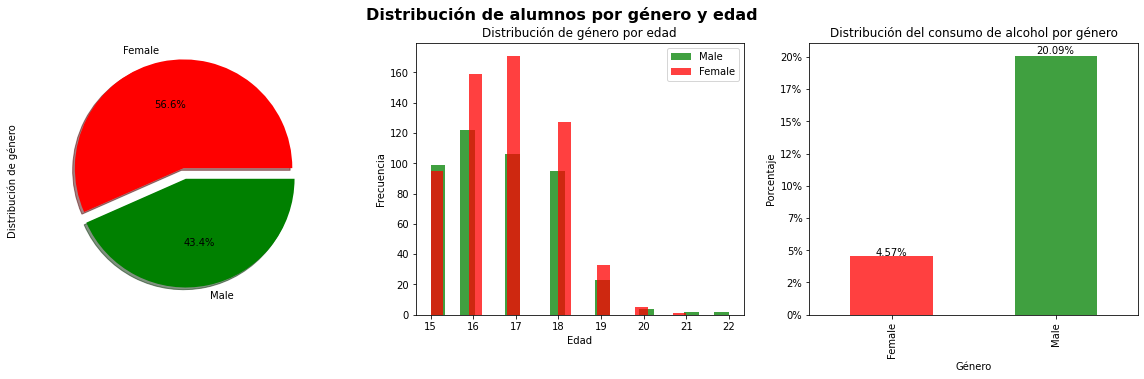

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Distribución de alumnos por género y edad', fontweight='bold', fontsize=16)

#crea un gráfico circular para la distribución de géneros
sexCountList=df.groupby('sex').count().iloc[:,1]
m=max(sexCountList)
explode = [0.1 if x==m else 0 for x in sexCountList]
ax[0].axis('equal')  # asegura que se dibuje como un círculo.

sexCountList.plot.pie(ax=ax[0], explode=explode, colors=['red','green'], autopct='%1.1f%%',shadow=True, startangle=0)
ax[0].set_ylabel('Distribución de género ')

# crear un histograma para la distribución de géneros por edad
df.loc[df.sex=='Male','age'].hist(ax=ax[1], bins=20, color='green', alpha=0.75, label='Male')
df.loc[df.sex=='Female','age'].hist(ax=ax[1], bins=20, color='red', alpha=0.75, label='Female')
ax[1].grid(False)
ax[1].legend()
ax[1].set_title('Distribución de género por edad')
ax[1].set_xlabel('Edad')
ax[1].set_ylabel('Frecuencia')

#gráfico de barras para la distribución del consumo de alcohol por género
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y*100)) #formating y values with percentage operator
ax[2].yaxis.set_major_formatter(formatter)
df.groupby('sex').mean().loc[:,'Alc'].plot.bar(ax=ax[2],color=['red','green'],alpha=0.75)
ax[2].set_title('Distribución del consumo de alcohol por género')
ax[2].set_xlabel('Género')
ax[2].set_ylabel('Porcentaje')
for rect in ax[2].patches:
    ax[2].annotate("%0.2f%%" % (rect.get_height()*100), (rect.get_x() + rect.get_width()/2., rect.get_height() * 1.01), ha='center')


plt.show()

De acuerdo a la distribucion de genero, el 56.6% son mujeres, y la mayoria de estudiantes estan entre los 16,17 y 18 años.

##### Distribuciones: consumo de alcohol según género y edad

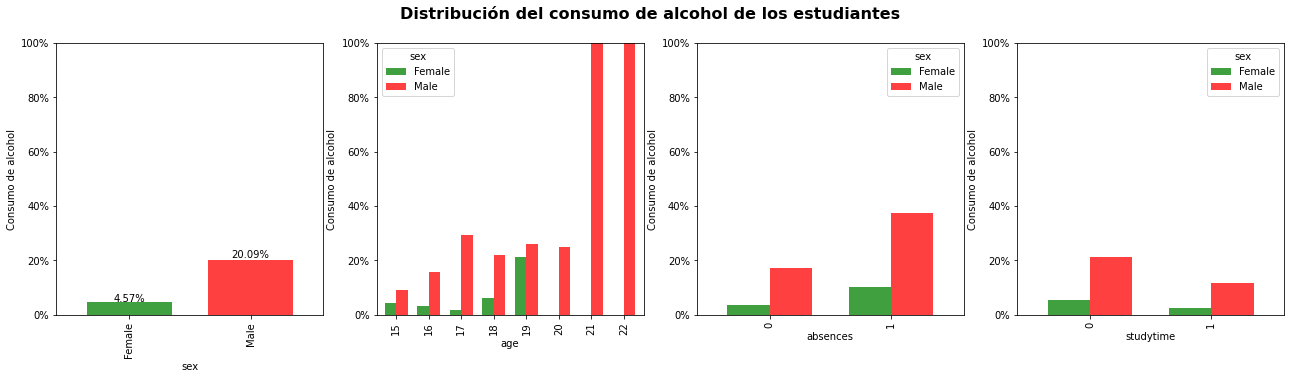

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(22, 5))
fig.suptitle('Distribución del consumo de alcohol de los estudiantes', fontweight='bold', fontsize=16)
dfs = []
w=0.7

#Bebedores por sexo
dfs.append(df.groupby('sex').mean().loc[:,'Alc'])
ax[0].set_xlabel('Genero')


#Bebedores por edad(
dfs.append(df.groupby(['sex','age']).mean().reset_index().pivot(index='age',columns='sex',values='Alc'))
ax[1].set_xlabel('Edad')

#Bebedores por tiempo de estudio
dfs.append(df.groupby(['sex','absences']).mean().reset_index().pivot(index='absences',columns='sex',values='Alc'))
ax[2].set_xlabel('Ausencias')

#bebedores por tiempo libre
dfs.append(df.groupby(['sex','studytime']).mean().loc[:,'Alc'].reset_index().pivot(index='studytime',columns='sex',values='Alc'))
ax[3].set_xlabel('Tiempo libre')

formatter = FuncFormatter(lambda y, pos: "%d%%" % (y*100))

for i,_ in enumerate(ax):
    ax[i].yaxis.set_major_formatter(formatter)
    dfs[i].plot.bar(ax=ax[i], width=w,color=['green','red'],alpha=0.75)
    if i==0:
        for rect in ax[i].patches:
            ax[i].annotate("%0.2f%%" % (rect.get_height()*100), (rect.get_x() + rect.get_width()/2., rect.get_height() * 1.05), ha='center')
    ax[i].grid(False)
    ax[i].set_ylim([0,1]) #clamp between [0,1]
    ax[i].set_ylabel('Consumo de alcohol')
    
plt.show()

En la gráfica anterior podemos ver lo que habíamos analizado al inicio:
- Los chicos (20,09%) consumen mucho más alcohol que las chicas (4,57%)
- El consumo de alcohol se dispara en los chicos mayores de 16 años
- Las ausencias a clase influyen en el aumento del consumo de alcohol
- El consumo de alcohol también se ve influenciado si no se dedica tiempo a estudiar

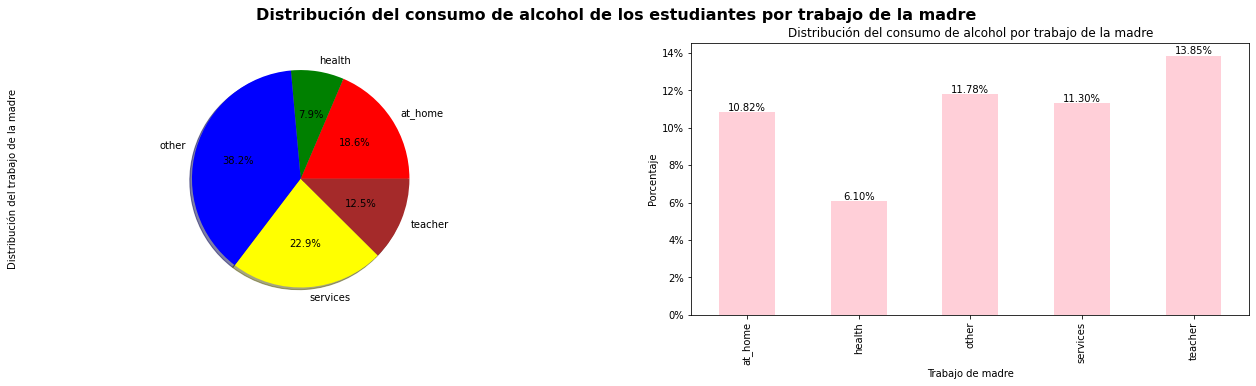

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(22, 5))
fig.suptitle('Distribución del consumo de alcohol de los estudiantes por trabajo de la madre', fontweight='bold', fontsize=16)

#create a pie chart for 
li=df.groupby('Mjob').count().iloc[:,1]
m=max(sexCountList)
explode = [0.1 if x==m else 0 for x in li]
ax[0].axis('equal')  # ensures that pie is drawn as a circle.

li.plot.pie(ax=ax[0], explode=explode, colors=['red','green', 'blue', 'yellow', 'brown'], autopct='%1.1f%%',shadow=True, startangle=0)
ax[0].set_ylabel('Distribución del trabajo de la madre')

#bar chart for alcohol consumption distribution by genre
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y*100)) #formating y values with percentage operator
ax[1].yaxis.set_major_formatter(formatter)
df.groupby('Mjob').mean().loc[:,'Alc'].plot.bar(ax=ax[1],color='pink',alpha=0.75)
ax[1].set_title('Distribución del consumo de alcohol por trabajo de la madre')
ax[1].set_xlabel('Trabajo de madre')
ax[1].set_ylabel('Porcentaje')
for rect in ax[1].patches:
    ax[1].annotate("%0.2f%%" % (rect.get_height()*100), (rect.get_x() + rect.get_width()/2., rect.get_height() * 1.01), ha='center')

plt.show()

##### Distribuciones: consumo de alcohol y tasa de aprobados
En esta gráfica observamos cómo la influencia del consumo de alcohol sobre los suspensos se ve agravada.

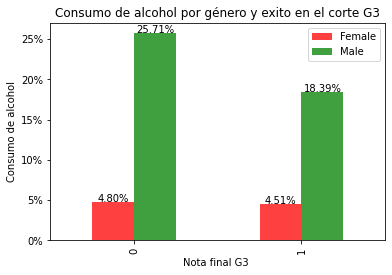

In [ ]:
fig, ax = plt.subplots()
#gráfico de barras para mostrar el consumo de alcohol por género y el éxito en la nota final (G3)
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y*100)) #formatear valores y con operador de porcentaje
ax.yaxis.set_major_formatter(formatter)
df.groupby(['sex','G3Pass']).mean().reset_index().pivot(index='G3Pass',columns='sex',values='Alc').plot.bar(ax=ax, color=['red','green'],alpha=0.75)
ax.set_title('Consumo de alcohol por género y exito en el corte G3')
ax.set_xlabel('Nota final G3 ')
ax.set_ylabel('Consumo de alcohol')
ax.legend()
for rect in ax.patches:
    ax.annotate("%0.2f%%" % (rect.get_height()*100), (rect.get_x() + rect.get_width()/2., rect.get_height() * 1.005), ha='center')

plt.show()

## Objetivo 2: Realizar una predicción sobre los valores objetivo (G1, G2 y G3)
Recordemos que hemos incluido 3 nuevas columnas para indicar si un alumno ha aprobado el G1, G2 y G3. Dichos campos son: G1Pass, G2Pass y G3Pass.

In [ ]:
#revertir algunos campos de nuevo
df.sex = df.sex.apply(lambda x: 0 if x=='Male' else 1)
df.Mjob = df.Mjob.apply(lambda x: parse_job_to_binary(x))
df.Fjob = df.Fjob.apply(lambda x: parse_job_to_binary(x))

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import random

#dividir el conjunto de datos en un 60% para entrenamiento y 40% para pruebas
def predict(train, labels, grades, algorithm = 'knn'):
    stratified_data = StratifiedShuffleSplit(n_splits=3, test_size=0.4, random_state=random.randint(0, 999))
    for i, j in stratified_data.split(train, labels):
        X_train = train.iloc[i]
        y_train = labels.iloc[i]
        X_test = train.iloc[j]
        y_test = labels.iloc[j]
    
    if algorithm == 'knn':
        model = KNeighborsClassifier()
    elif algorithm == 'dt':
        model = DecisionTreeClassifier()        
    elif algorithm == 'LR':
        model = LogisticRegression()
    elif algorithm == "NB":
        model = RandomForestClassifier()
        
    
    model.fit(train, labels)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print("Results for " + grades + " (algorithm = " + algorithm + "):")
    print(classification_report(y_test, pred, target_names=["No-pass", "Pass"]))
    print("Acuracy: %0.2f%%" % (accuracy*100) + "\n")
    print("Confusion matrix " + grades + ":")
    print(confusion_matrix(y_test, pred))
    print("\n") 


#delete some columns
train = df.drop(['Walc','Dalc','G1','G2','G3','G1Pass','G2Pass','G3Pass'], axis = 1)

"""imprimir los resultados finales"""

#con kNN
predict(train, df['G1Pass'], "G1", algorithm='knn')
predict(train, df['G2Pass'], "G2", algorithm='knn')
predict(train, df['G3Pass'], "G3", algorithm='knn')

#con Decision Tree
predict(train, df['G1Pass'], "G1", algorithm='dt')
predict(train, df['G2Pass'], "G2", algorithm='dt')
predict(train, df['G3Pass'], "G3", algorithm='dt')

#con Naive_bayes
predict(train, df['G1Pass'], "G1", algorithm='NB')
predict(train, df['G2Pass'], "G2", algorithm='NB')
predict(train, df['G3Pass'], "G3", algorithm='NB')

Results for G1 (algorithm = knn):
              precision    recall  f1-score   support

     No-pass       0.81      0.42      0.55       120
        Pass       0.80      0.96      0.87       298

    accuracy                           0.80       418
   macro avg       0.80      0.69      0.71       418
weighted avg       0.80      0.80      0.78       418

Acuracy: 80.38%

Confusion matrix G1:
[[ 50  70]
 [ 12 286]]


Results for G2 (algorithm = knn):
              precision    recall  f1-score   support

     No-pass       0.76      0.36      0.49       117
        Pass       0.79      0.96      0.87       301

    accuracy                           0.79       418
   macro avg       0.78      0.66      0.68       418
weighted avg       0.79      0.79      0.76       418

Acuracy: 78.95%

Confusion matrix G2:
[[ 42  75]
 [ 13 288]]


Results for G3 (algorithm = knn):
              precision    recall  f1-score   support

     No-pass       0.79      0.29      0.43        92
        P

## TODO: Multivariate

## Conclusiones
Hemos habilitado la predicción con diferentes algoritmos y estos son los resultados obtenidos:
- Decision Tree: G1 accuracy: 96.89%, G2 accuracy: 96.65%, G3 accuracy: 97.37%.
- kNN: G1 accuracy: 80.86%, G2 accuracy: 82.06%, G3 accuracy: 81.58%.
- GaussianNB: G1 accuracy: 96.41%, G2 accuracy: 95.93%, G3 accuracy: 97.85%.

Los mejores resultados se consiguen con Decision Tree.

Podemos fijarnos también en la matriz de confusión donde observamos que la sensibilidad y la sensibilidad están muy parejos. 

Además, en general, el número de falsos positivos es muy reducido (lo cual nos interesa, preferiremos predecir con mayor precisión los «aprobados» en comparación con los «suspensos»).

### Trabajo futuro
Un posible trabajo futuro sería tratar de ajustar (tuning) los clasificadores para mejorar la accuracy.